In [1]:
import pandas as pd
import requests
import scipy as sc
import sklearn
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
import statsmodels.api as sm
import sys
### Gensim is outside the anaconda distribution ###
### uncomment to install Gensim ###
#!{sys.executable} -m pip install gensim
import gensim
import gensim.downloader as model_api
import json
import matplotlib.pyplot as plt
import sklearn.feature_extraction.text as text
import gensim
import gensim.downloader as model_api
import numpy as np
import re

In [7]:
word_vectors = model_api.load("glove-wiki-gigaword-50")

# 1. App Review NLP work

This question uses the Apple App review dataset that you generated in the "Pulling online data" workshop. Your dataset should have at least 3-5 different applications, with data from a few countries.

**1.1** Using the bag-of-words or TF-IDF vector model (from SKLearn), cluster the reviews into 5 clusters. Measure the accuracy of the cluster overlap against the real review scores.

**1.2** Now use a sentence embedding using on of the `gensim` pre-trained word embedding models to achieve the same in clustering. Get the best classification accuracy score you can on the 5-star review scale targer using all unsupervised methods you want.

**1.3** Using any method you want (pre-trained models, dimensionality reduction, feature engineering, etc.) make the best **regression** model you can to predict the 5 star rating. Rate the accuracy in regression terms (mean squared error) and in classification terms (accuracy score, etc.)

**1.4** Do the same as in 1.3, but use a classification model. Are classification models better or worse to predict a 5-point rating scale? Explain in a few paragraphs and justify with metrics.


In [9]:
#1.1

final = []
co = ['us', 'gb', 'ca', 'au','uk']
apps = [553834731,547702041,284882215,333903271]
pp = 1
for c in co:
    pp = 1
    for app in apps:
        try:
            #print(f'page number: {pp}')
            r = requests.get(f"https://itunes.apple.com/{c}/rss/customerreviews/id={app}/page={pp}/sortby=mostrecent/json")
            cc = json.loads(r.content)
            if r.status_code == 200:
                for i in cc['feed']['entry']:
                    # if i['im:rating']['label'] == '5':
                    final.append([app,i['content']['label'],i['im:rating']['label']])
                        # final.append([app,i['content']['label']])
            pp += 1
        except:
            print('error')

df = pd.DataFrame(final)
df.columns=['app_id','review','rating']
df.rating = df.rating.astype(float)

error
error
error
error


In [10]:
df.rating.unique()

array([1., 4., 5., 2., 3.])

In [9]:
# conda update conda
# conda install -c conda-forge UMAP-learn
# pip install -c conda-forge umap-learn
# conda install -c conda-forge UMAP-learn
# from umap import UMAP

In [11]:
tf = text.TfidfVectorizer()
X = tf.fit_transform(df['review'])

Xd = X.toarray()
Xd = PCA(5).fit(Xd.T).components_.T
Xd = sm.add_constant(Xd)

pred = Xd @ sc.linalg.inv(Xd.T @ Xd) @ Xd.T @ df['rating'].values
print("OLS R^2: ", r2_score(df['rating'], pred))

OLS R^2:  0.1848653356674057


In [ ]:
#1.2

In [51]:
# !{sys.executable} -m pip install gensim
### Gensim is outside the anaconda distribution ###
### uncomment to install Gensim ###
#!{sys.executable} -m pip install gensim
# Load pretrained word embeddings
# This will download 60mb of data the first time it's loaded


In [12]:
words = df.review.str.split()
words = pd.DataFrame(words.tolist())

In [13]:
replaceDict = dict({
'{':" ", '}':" ", ',':"", '.':" ", '!':" ", '\\':" ", '/':" ", '$':" ", '%':" ",
'^':" ", '?':" ", '\'':" ", '"':" ", '(':" ", ')':" ", '*':" ", '+':" ", '-':" ",
'=':" ", ':':" ", ';':" ", ']':" ", '[':" ", '`':" ", '~':" ",
})

rep = dict((re.escape(k), v) for k, v in replaceDict.items())
pattern = re.compile("|".join(rep.keys()))
def replacer(text):
    return rep[re.escape(text.group(0))]

words = df.review.str.replace(pattern, replacer).str.lower().str.split()
words = pd.DataFrame(words.tolist())

In [31]:
# def soft_get(w):
#     try:
#         return word_vectors[w]
#     except KeyError:
#         return np.zeros(word_vectors.vector_size)

# def map_vectors(row):
#     try:
#         return np.sum(
#             row.loc[row.notna()].apply(soft_get)
#         )
#     except:
#         return np.zeros(word_vectors.vector_size)
        
# word_emb = words.apply(map_vectors, axis=1)
# # emb = pd.DataFrame(words.apply(map_vectors, axis=1).tolist())
# # emb

# emb_df = pd.DataFrame(word_emb)
# emb = pd.DataFrame(emb_df[0].to_list())
# emb

In [32]:
def soft_get(w):
    try:
        return word_vectors[w]
    except KeyError:
        return np.zeros(word_vectors.vector_size)

def map_vectors(row):
    try:
        return np.sum(
            row.loc[words.iloc[0].notna()].apply(soft_get)
        )
    except:
        return np.zeros(word_vectors.vector_size)

emb = pd.DataFrame(words.apply(map_vectors, axis=1).tolist())

In [33]:
emb

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,2.146769,1.749999,4.124688,-0.498597,0.148239,-3.639533,-3.490530,2.965257,-4.262772,-3.204376,...,0.804061,-2.269240,2.103077,1.496870,0.544984,5.040560,1.001900,0.481288,1.038896,3.157664
1,2.090929,1.793840,-0.021180,1.016870,3.385140,1.956180,-0.731013,-0.498840,-1.792060,2.805380,...,-0.380533,-0.111570,-1.321780,2.538361,-0.710855,0.311273,-1.136410,3.099398,1.319810,0.190585
2,4.232570,1.246000,0.974223,-1.980617,4.500271,1.264093,-1.724586,0.070053,-1.246602,0.924916,...,-1.806593,-0.720235,-0.846950,4.021765,-1.230784,0.290026,-3.689202,2.225348,0.573296,3.180008
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2.931960,-0.370293,1.074832,-2.381397,3.274414,-0.509894,-5.932840,0.609986,-2.385062,-0.763706,...,-2.068904,0.246771,0.588042,2.008133,-0.654553,0.091629,-1.263315,-2.179498,-1.413356,-0.910810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.322417,0.994580,1.896879,-0.764985,0.570395,2.044994,-6.999060,-1.688249,-1.731733,-0.102307,...,-1.553606,-0.161187,-0.760298,0.740320,-0.489220,-1.063173,-2.457497,-1.352975,-1.343197,-1.522710
796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
797,3.858921,1.070660,0.292830,0.725935,1.214756,1.348176,-2.211504,-5.040150,2.978812,1.180517,...,-0.167603,0.268181,-1.004230,0.957603,-1.353730,1.082269,-1.687062,2.049575,2.071007,-3.693418
798,3.394360,-2.063804,1.167514,-0.413636,2.169003,1.877700,-1.466757,-3.082761,-2.019830,1.324909,...,-0.532040,2.244296,-1.077560,4.715369,-1.854200,0.338286,-1.570616,4.263900,0.151502,-0.293154


In [34]:
sgdr = SGDRegressor(max_iter=11100)#loss='epsilon_insensitive')
sgdr.fit(emb, df.rating)
sgdr.score(emb, df.rating)

-1.5755126024187584e+17

1.3 Using any method you want (pre-trained models, dimensionality reduction, feature engineering, etc.) make the best regression model you can to predict the 5 star rating. Rate the accuracy in regression terms (mean squared error) and in classification terms (accuracy score, etc.)

In [43]:
# from sklearn.decomposition import PCA
# PCA?

In [36]:
# #1.3
# pca
# teasne
from sklearn.preprocessing import StandardScaler #word embading
scaler = StandardScaler()
emb = scaler.fit_transform(emb)


In [41]:
# tf = text.TfidfVectorizer()
X = tf.fit_transform(df['review'])

Xd = X.toarray()
Xd = PCA(50).fit(Xd.T).components_.T
# scaler = StandardScaler()
# Xd = scaler.fit_transform(Xd)

Xd = sm.add_constant(Xd)

pred = Xd @ sc.linalg.inv(Xd.T @ Xd) @ Xd.T @ df['rating'].values
print("OLS R^2: ", r2_score(df['rating'], pred))

OLS R^2:  0.3379087395073559


1.4 Do the same as in 1.3, but use a classification model. Are classification models better or worse to predict a 5-point rating scale? Explain in a few paragraphs and justify with metrics.

In [49]:
from sklearn.model_selection import train_test_split
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(Xd, y, test_size=0.15, random_state=42)

In [52]:
#1.4
# Desision tree classifier
# dc.fi  train data  
# predict

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [63]:
# https://analyticsindiamag.com/7-types-classification-algorithms/
# from sklearn.tree import DecisionTreeClassifie
from sklearn import tree

dtree = tree.DecisionTreeClassifier(max_depth=10, random_state=101, max_features=None, min_samples_leaf=15)
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

In [64]:
y_pred


array([1., 2., 1., 1., 5., 1., 1., 2., 2., 2., 1., 1., 5., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 5., 1., 1., 5., 1., 1., 1.,
       5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 5., 5., 2., 1.,
       1., 2., 1., 1., 1., 2., 1., 1., 1., 5., 1., 1., 1., 1., 1., 1., 1.,
       1., 5., 1., 1., 1., 5., 5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 5., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 5., 1., 1., 1., 1., 5., 2., 1., 2., 1., 1., 1., 1., 1.,
       1.])

In [72]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print("OLS R^2: ", metrics.r2_score(y_test, y_pred))

[[70  8  0  0  6]
 [ 5  1  0  0  0]
 [ 3  1  0  0  2]
 [ 4  1  0  0  2]
 [11  2  0  0  4]]
              precision    recall  f1-score   support

         1.0       0.75      0.83      0.79        84
         2.0       0.08      0.17      0.11         6
         3.0       0.00      0.00      0.00         6
         4.0       0.00      0.00      0.00         7
         5.0       0.29      0.24      0.26        17

    accuracy                           0.62       120
   macro avg       0.22      0.25      0.23       120
weighted avg       0.57      0.62      0.60       120

OLS R^2:  -0.35760872925102816
C:\Users\mr_na\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mr_na\anaconda3\lib\site-packages\sklearn\metrics\_classification

## 2. Face data

Here let's apply manifold learning on some face data.

Use the following code:

```
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
```

To get the `faces` dataset.

Use dimensionality reduction so that the darkness of the image is sorted in the first dimension as seen in this picture:

![](isofaces.png)

Then produce a picture similar to this one with your result

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)

In [79]:
data = faces.data

In [80]:
images = faces.images

In [ ]:
# https://github.com/cb-ds-1/4-6-dimensionality-reduction/blob/main/02_manifold_learning.ipynb

In [85]:

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(df)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

# Choose 1/4 of the "1" digits to project
# data = mnist.data[mnist.target == 1][::4]

fig, ax = plt.subplots(figsize=(10, 10))
model = umap.UMAP(n_neighbors=5, n_components=2)

plot_components(data, model, images=data.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')

NameError: name 'umap' is not defined

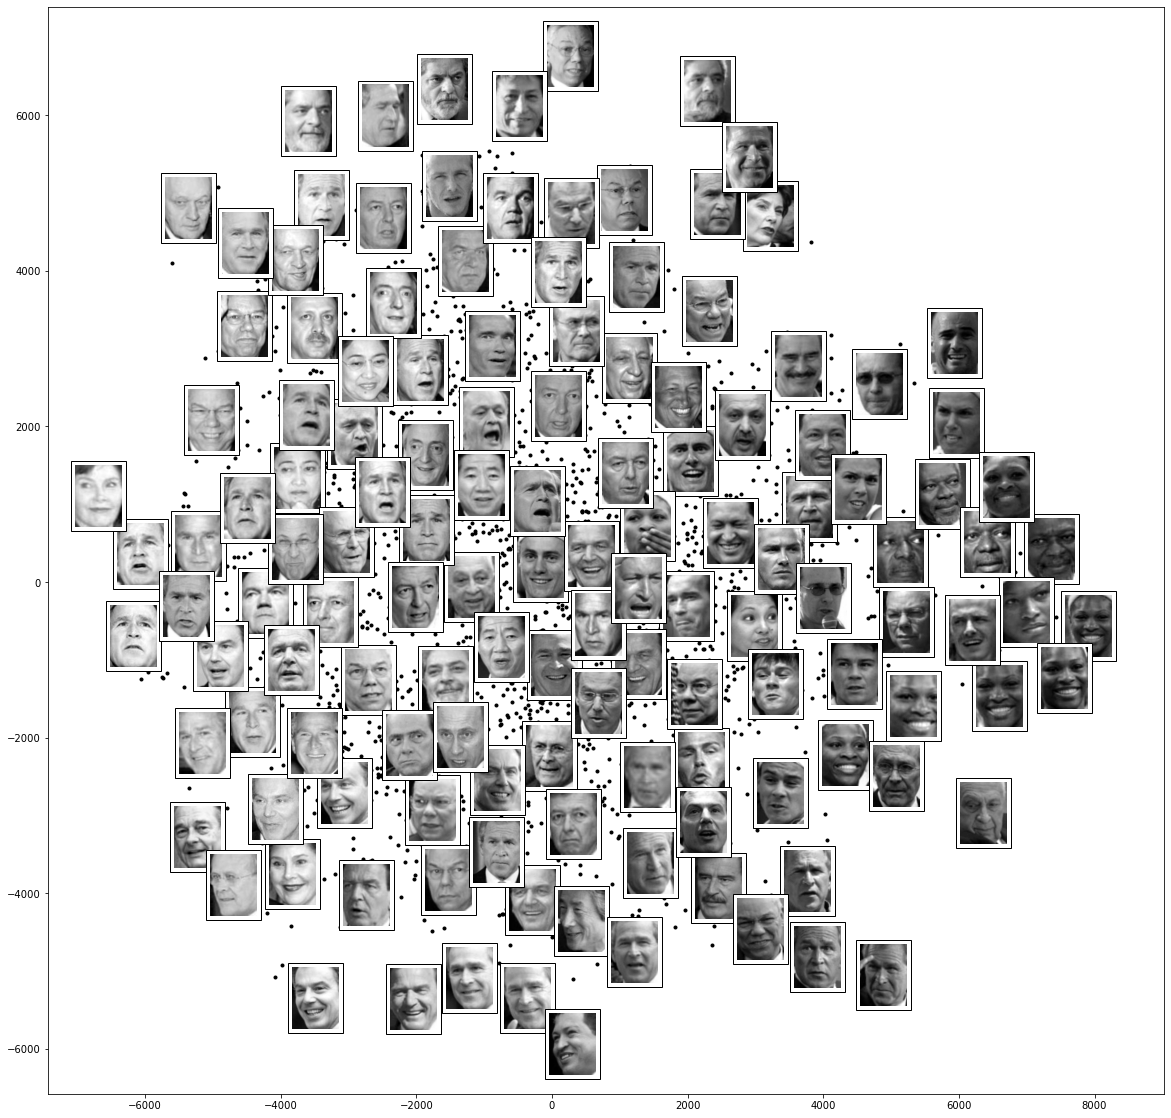

In [87]:
from sklearn.manifold import Isomap
from matplotlib import offsetbox
#import umap

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),proj[i])
            ax.add_artist(imagebox)

# Choose 1/4 of the "1" digits to project
# data = mnist.data[mnist.target == 1][::4]

fig, ax = plt.subplots(figsize=(20, 20))
#model = umap.UMAP(n_neighbors=4, n_components=2, random_state=92)
model = Isomap(n_components=2)
plot_components(data, model, images=images, ax=ax, thumb_frac=0.05)